# Day 42: 70 Days Pre-Bootcamp Online Class with Data Science Nigeria - Machine Learning Stream #DSN70daysofML
Mean Shift Dynamic Bandwidth <br>

In [1]:
#import libraries
import numpy as np


import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [2]:
data = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11],
              [8,2],
              [10,2],
              [9,3],])

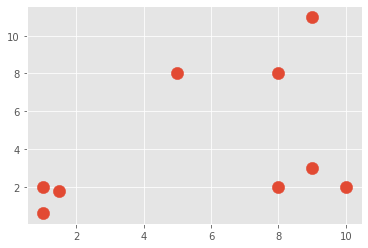

In [3]:
plt.scatter(data[:,0], data[:,1], s=150)
plt.show()

colors = 10*['g', 'r', 'c', 'b', 'k']

In [6]:

class Mean_Shift:
    def __init__(self, radius=None, radius_norm_step = 100):
        self.radius = radius
        self.radius_norm_step = radius_norm_step

# So the plan here is to create a massive radius, but make that radius go in steps, 
# like bandwidths, or a bunch of radiuses with different lengths, which we'll call steps. 
# If a featureset is in the closest radius, it will have a much higher "weight" than one much further away.
    def fit(self, data):
        
        if self.radius == None:
            all_data_centroid = np.average(data, axis=0)
            all_data_norm = np.linalg.norm(all_data_centroid)
            self.radius = all_data_norm / self.radius_norm_step
            
        centroids = {}

        for i in range(len(data)):
            centroids[i] = data[i]
            weights = [i for i in range(self.radius_norm_step)][::-1]
        while True:
            new_centroids = []
            for i in centroids:
                in_bandwidth = []
                centroid = centroids[i]
                
                for featureset in data:
                    #if np.linalg.norm(featureset-centroid) < self.radius:
                    #    in_bandwidth.append(featureset)
                    distance = np.linalg.norm(featureset-centroid)
                    if distance == 0:
                        distance = 0.00000000001
                    weight_index = int(distance/self.radius)
                    if weight_index > self.radius_norm_step-1:
                        weight_index = self.radius_norm_step-1

                    to_add = (weights[weight_index]**2)*[featureset]
                    in_bandwidth +=to_add
                    

                new_centroid = np.average(in_bandwidth,axis=0)
                new_centroids.append(tuple(new_centroid))

            uniques = sorted(list(set(new_centroids)))

# The weights list is just a simple list that we'll take how many "radius steps" a featureset is from the centroid, take those # of steps, treating them as index values for the weight list. 
# Iterating through the features, we calculate distances, add weights, then add the "weighted" number of centroids to the in_bandwidth. 
# When all done, we take the average of in_bandwidth, making that the new centroid.
            to_pop = []

            for i in uniques:
                for ii in [i for i in uniques]:
                    if i == ii:
                        pass
                    elif np.linalg.norm(np.array(i)-np.array(ii)) <= self.radius:
                        #print(np.array(i), np.array(ii))
                        to_pop.append(ii)
                        break

            for i in to_pop:
                try:
                    uniques.remove(i)
                except:
                    pass
                
            prev_centroids = dict(centroids)
            centroids = {}
            for i in range(len(uniques)):
                centroids[i] = np.array(uniques[i])

            optimized = True

            for i in centroids:
                if not np.array_equal(centroids[i], prev_centroids[i]):
                    optimized = False

            if optimized:
                break

        
        self.centroids = centroids
        
        self.classifications = {}

        for i in range(len(self.centroids)):
            self.classifications[i] = []
            
        for featureset in data:
            #compare distance to either centroid
            distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
            #print(distances)
            classification = (distances.index(min(distances)))

            # featureset that belongs to that cluster
            self.classifications[classification].append(featureset)

In [7]:
def predict(self,data):
        #compare distance to either centroid
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = (distances.index(min(distances)))
        return classification

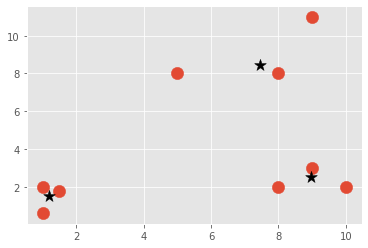

In [8]:
clf = Mean_Shift()
clf.fit(data)

centroids = clf.centroids

plt.scatter(data[:,0], data[:,1], s=150)

for c in centroids:
    plt.scatter(centroids[c][0], centroids[c][1], color='k', marker='*', s=150)

plt.show()